In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
% matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [0]:
dataset = pd.read_csv("train_csv.csv")
#dataset['time'] = pd.to_datetime(dataset['time'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['time'])
indexedDataset = indexedDataset.drop(columns=['id'])


In [16]:
from datetime import datetime
indexedDataset.head(5)

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


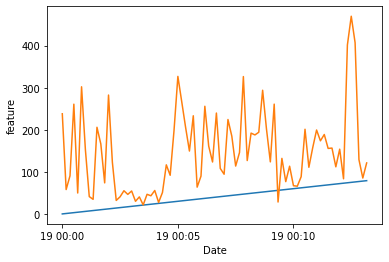

In [9]:
## plot graph

plt.xlabel('Date')
plt.ylabel('feature')
plt.plot(indexedDataset)


In [11]:
rolmean = indexedDataset.rolling(window =12).mean()
rolstd = indexedDataset.rolling(window =12).std()

print(rolmean, rolstd)

                       id     feature
time                                 
2019-03-19 00:00:00   NaN         NaN
2019-03-19 00:00:10   NaN         NaN
2019-03-19 00:00:20   NaN         NaN
2019-03-19 00:00:30   NaN         NaN
2019-03-19 00:00:40   NaN         NaN
...                   ...         ...
2019-03-19 00:12:30  69.5  196.868333
2019-03-19 00:12:40  70.5  221.535000
2019-03-19 00:12:50  71.5  219.163333
2019-03-19 00:13:00  72.5  209.655833
2019-03-19 00:13:10  73.5  205.272500

[80 rows x 2 columns]                            id     feature
time                                     
2019-03-19 00:00:00       NaN         NaN
2019-03-19 00:00:10       NaN         NaN
2019-03-19 00:00:20       NaN         NaN
2019-03-19 00:00:30       NaN         NaN
2019-03-19 00:00:40       NaN         NaN
...                       ...         ...
2019-03-19 00:12:30  3.605551  117.212581
2019-03-19 00:12:40  3.605551  128.091932
2019-03-19 00:12:50  3.605551  129.642067
2019-03-19 00:13:00  

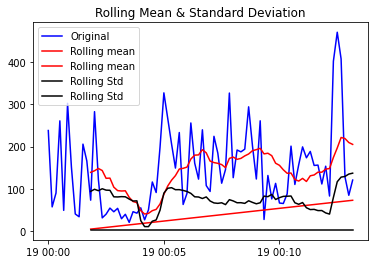

In [19]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label='Original')
mean = plt.plot(rolmean, color = 'red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [24]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-fuller Test:')
dftest = adfuller(indexedDataset['feature'], autolag='AIC')
## achairc information criteria
dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Results of Dickey-fuller Test:
Test Statistic                -5.945866e+00
p-value                        2.205049e-07
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical value (1%)           -3.515977e+00
Critical value (5%)           -2.898886e+00
Critical value (10%)          -2.586694e+00
dtype: float64


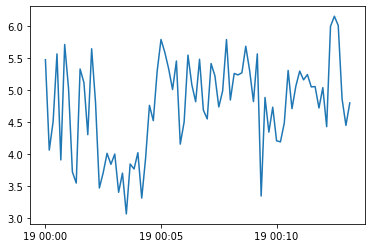

In [25]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

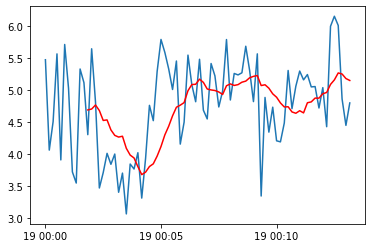

In [26]:
movingAverage = indexedDataset_logScale.rolling(window =12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [0]:
logminusavg = indexedDataset_logScale - movingAverage
logminusavg.head(12)

logminusavg.dropna(inplace=True)
logminusavg.head(10)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  # plot rolling stats
  orig = plt.plot(timeseries, color= 'blue', label = 'Orignial')
  mean= plt.plot(movingAverage, color= 'red', label='Rolling Mean')
  std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  # Perform Dickey fuller
  print('Results of Dickey-fuller Test')
  dftest = adfuller(timeseries['feature'],autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['ritical Value (%s)' %key] = value
  print(dfoutput)




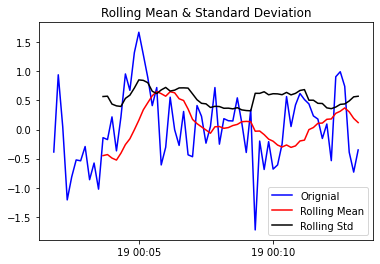

Results of Dickey-fuller Test
Test Statistic                 -3.408749
p-value                         0.010664
#Lags Used                      1.000000
Number of Observations Used    67.000000
ritical Value (1%)             -3.531955
ritical Value (5%)             -2.905755
ritical Value (10%)            -2.590357
dtype: float64


In [32]:
test_stationarity(logminusavg)

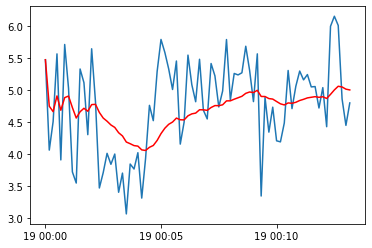

In [35]:
expdecaymovavg = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(expdecaymovavg, color = 'red')

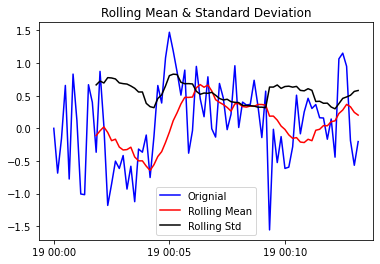

Results of Dickey-fuller Test
Test Statistic                 -4.271237
p-value                         0.000498
#Lags Used                      1.000000
Number of Observations Used    78.000000
ritical Value (1%)             -3.517114
ritical Value (5%)             -2.899375
ritical Value (10%)            -2.586955
dtype: float64


In [36]:
dataminusexpdecayavg = indexedDataset_logScale - expdecaymovavg
test_stationarity(dataminusexpdecayavg)

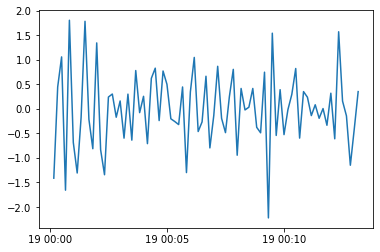

In [37]:
datasetlogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogDiffShifting)


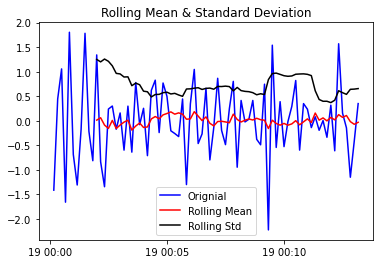

Results of Dickey-fuller Test
Test Statistic                -1.049024e+01
p-value                        1.152048e-18
#Lags Used                     1.000000e+00
Number of Observations Used    7.700000e+01
ritical Value (1%)            -3.518281e+00
ritical Value (5%)            -2.899878e+00
ritical Value (10%)           -2.587223e+00
dtype: float64


In [38]:
datasetlogDiffShifting.dropna(inplace =True)
test_stationarity(datasetlogDiffShifting)

In [49]:
X = indexedDataset.values
print(X)

[[237.97]
 [ 57.93]
 [ 90.53]
 [260.75]
 [ 49.7 ]
 [302.08]
 [152.25]
 [ 41.19]
 [ 34.61]
 [205.87]
 [166.23]
 [ 73.75]
 [282.46]
 [122.71]
 [ 32.04]
 [ 40.73]
 [ 55.06]
 [ 46.4 ]
 [ 54.46]
 [ 29.97]
 [ 40.43]
 [ 21.36]
 [ 46.59]
 [ 43.11]
 [ 55.62]
 [ 27.36]
 [ 50.94]
 [116.61]
 [ 91.8 ]
 [198.32]
 [326.76]
 [266.69]
 [205.95]
 [149.42]
 [233.22]
 [ 63.63]
 [ 89.77]
 [255.79]
 [161.08]
 [123.41]
 [239.69]
 [108.12]
 [ 94.31]
 [224.3 ]
 [184.75]
 [113.74]
 [146.06]
 [326.35]
 [126.81]
 [192.  ]
 [187.7 ]
 [194.04]
 [293.84]
 [201.54]
 [123.67]
 [260.87]
 [ 28.26]
 [131.97]
 [ 76.73]
 [113.35]
 [ 67.01]
 [ 65.89]
 [ 88.47]
 [201.17]
 [110.79]
 [157.37]
 [199.37]
 [173.72]
 [188.69]
 [155.62]
 [156.46]
 [111.91]
 [153.83]
 [ 83.51]
 [401.43]
 [469.72]
 [406.79]
 [128.91]
 [ 85.28]
 [121.12]]


predicted=128.810000, expected=260.750000
predicted=136.403333, expected=49.700000
predicted=133.660000, expected=302.080000
predicted=204.176667, expected=152.250000
predicted=168.010000, expected=41.190000
predicted=165.173333, expected=34.610000
predicted=76.016667, expected=205.870000
predicted=93.890000, expected=166.230000
predicted=135.570000, expected=73.750000
predicted=148.616667, expected=282.460000
predicted=174.146667, expected=122.710000
predicted=159.640000, expected=32.040000
predicted=145.736667, expected=40.730000
predicted=65.160000, expected=55.060000
predicted=42.610000, expected=46.400000
predicted=47.396667, expected=54.460000
predicted=51.973333, expected=29.970000
predicted=43.610000, expected=40.430000
predicted=41.620000, expected=21.360000
predicted=30.586667, expected=46.590000
predicted=36.126667, expected=43.110000
predicted=37.020000, expected=55.620000
predicted=48.440000, expected=27.360000
predicted=42.030000, expected=50.940000
predicted=44.640000, e

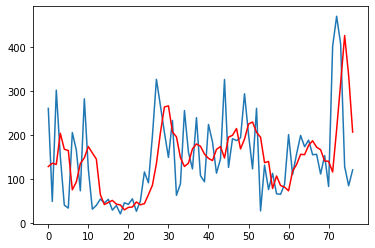

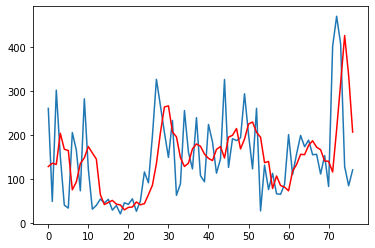

In [51]:
from numpy import mean
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
X = indexedDataset.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()



40

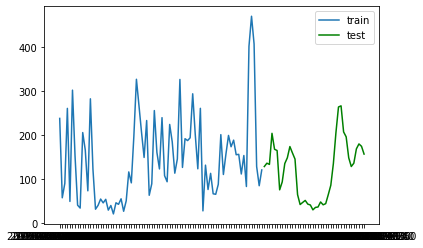

In [75]:
testpredict = pd.read_csv('test_csv.csv')
#testpredict['time'] = pd.to_datetime(dataset['time'], infer_datetime_format= True)
testpredict = testpredict.set_index(['time'])
testpredict = testpredict.drop(columns=['id'])
arr = np.array(predictions)
testpredict['feature'] = arr[0: len(testpredict)]

plt.plot(indexedDataset['feature'], label='train') 
plt.plot(testpredict['feature'], label = 'test',color= 'green')
plt.legend(loc='best') 
plt.show() 

testpredict.head()
testpredict.to_csv('terrablue.csv')

